In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [11]:
data = pd.read_csv("Breast_cancer_data.csv")

In [12]:
data.head(10)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness   
0        17.99         10.38          122.80     1001.0          0.11840  \
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0

<AxesSubplot:>

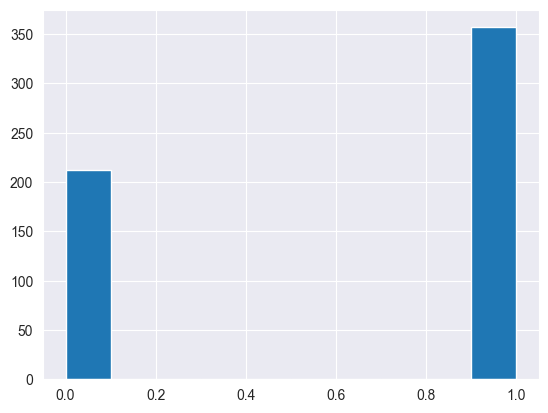

In [13]:
data["diagnosis"].hist()

<AxesSubplot:>

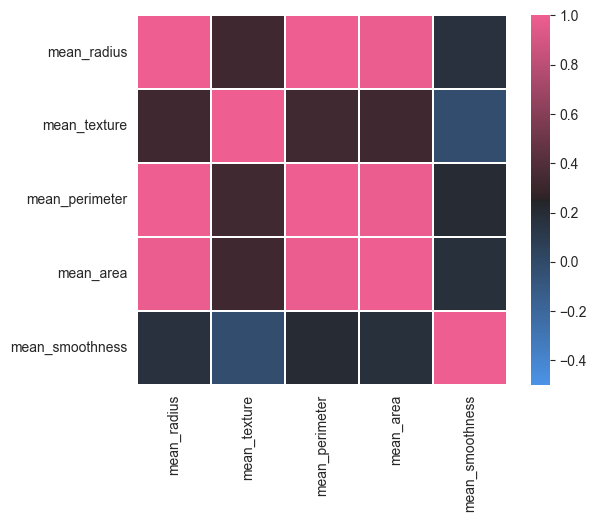

In [14]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [15]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

mean_radius  mean_texture  mean_smoothness  diagnosis
0        17.99         10.38          0.11840          0
1        20.57         17.77          0.08474          0
2        19.69         21.25          0.10960          0
3        11.42         20.38          0.14250          0
4        20.29         14.34          0.10030          0
5        12.45         15.70          0.12780          0
6        18.25         19.98          0.09463          0
7        13.71         20.83          0.11890          0
8        13.00         21.82          0.12730          0
9        12.46         24.04          0.11860          0

<AxesSubplot:xlabel='mean_texture', ylabel='Count'>

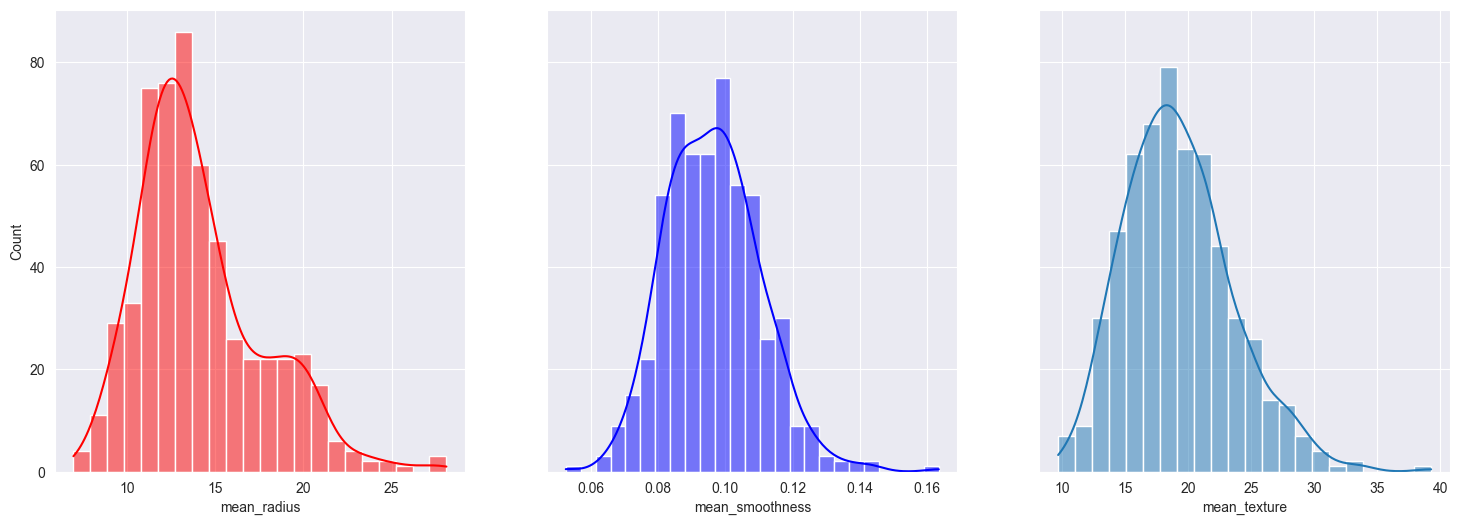

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score

# Split the data into a training set and a testing set
train, test = train_test_split(data, test_size=0.2, random_state=41)

# Define features and target variables for the training and testing sets
X_train = train.iloc[:, :-1].values
Y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train, Y_train)

# Predict on the test data
Y_pred = clf.predict(X_test)

# Calculate and print the confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the F1 score
f1 = f1_score(Y_test, Y_pred)
print("F1 Score:", f1)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate and print the precision
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)


Confusion Matrix:
[[36  4]
 [ 0 74]]
F1 Score: 0.9736842105263158
Accuracy: 0.9649122807017544
Precision: 0.9487179487179487
